### Dependencies

In [1]:
import numpy as np
import pandas as pd
import requests
import io
from matplotlib import pyplot as plt
import matplotlib

### Getting The Data From CDC

In [2]:
#Personal Smoking Habits
questionnaire_url_18 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2017-2018/P_SMQ.XPT'
questionnaire_url_16 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2015-2016/SMQ_I.XPT'
questionnaire_url_14 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2013-2014/SMQ_H.XPT'
questionnaire_url_12 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2011-2012/SMQ_G.XPT'
questionnaire_url_10 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2009-2010/SMQ_F.XPT'
questionnaire_url_8  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2007-2008/SMQ_E.XPT'
questionnaire_url_6  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2005-2006/SMQ_D.XPT'
questionnaire_url_4  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2003-2004/SMQ_C.XPT'
questionnaire_url_2  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2001-2002/SMQ_B.XPT'
questionnaire_url_0  = 'https://wwwn.cdc.gov//Nchs/Nhanes/1999-2000/SMQ.XPT'

#Second Hand smoke Exposure
shs_questionnaire_url_18 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2017-2018/P_SMQFAM.XPT'
shs_questionnaire_url_16 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2015-2016/SMQFAM_I.XPT'
shs_questionnaire_url_14 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2013-2014/SMQFAM_H.XPT'
shs_questionnaire_url_12 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2011-2012/SMQFAM_G.XPT'
shs_questionnaire_url_10 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2009-2010/SMQFAM_F.XPT'
shs_questionnaire_url_8  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2007-2008/SMQFAM_E.XPT'
shs_questionnaire_url_6  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2005-2006/SMQFAM_D.XPT'
shs_questionnaire_url_4  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2003-2004/SMQFAM_C.XPT'
shs_questionnaire_url_2  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2001-2002/SMQFAM_B.XPT'
shs_questionnaire_url_0  = 'https://wwwn.cdc.gov//Nchs/Nhanes/1999-2000/SMQFAM.XPT'


#VOC levels
voc_url_18 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2017-2018/P_VOCWB.XPT'
voc_url_16 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2015-2016/VOCWB_I.XPT'
voc_url_14 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2013-2014/VOCWB_H.XPT'
voc_url_12 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2011-2012/VOCWB_G.XPT'
voc_url_10 = 'https://wwwn.cdc.gov//Nchs/Nhanes/2009-2010/VOCWB_F.XPT'
voc_url_8  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2007-2008/VOCWB_E.XPT'
voc_url_6  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2005-2006/VOCWB_D.XPT'
voc_url_4  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2003-2004/L04VOC_C.XPT'
voc_url_2  = 'https://wwwn.cdc.gov//Nchs/Nhanes/2001-2002/L04VOC_B.XPT'
voc_url_0  = 'https://wwwn.cdc.gov//Nchs/Nhanes/1999-2000/LAB04.XPT'

urls_2013 = [(shs_questionnaire_url_0, questionnaire_url_0, voc_url_0),(shs_questionnaire_url_2, questionnaire_url_2, voc_url_2),(shs_questionnaire_url_4, questionnaire_url_4, voc_url_4),
        (shs_questionnaire_url_6, questionnaire_url_6, voc_url_6),(shs_questionnaire_url_8, questionnaire_url_8, voc_url_8),(shs_questionnaire_url_10, questionnaire_url_10, voc_url_10),
        (shs_questionnaire_url_12, questionnaire_url_12, voc_url_12)]

urls_2014 = [(shs_questionnaire_url_14, questionnaire_url_14, voc_url_14),(shs_questionnaire_url_16, questionnaire_url_16, voc_url_16),
        (shs_questionnaire_url_18,questionnaire_url_18, voc_url_18)]

In [3]:

def read_sas_url(url):
    r = requests.get(url)
    return pd.read_sas(io.BytesIO(r.content), format= 'xport')

def request_data(urls, predictors_list, response_var_d, response_var_sh):

    #merge the data frames based on the response
    all_dfs = []

    for url_sh, url_d, url_X in urls:

        print(f"Fetching Data for Year: {url_X[34:43] }")

        X = read_sas_url(url_X)
        d = read_sas_url(url_d)
        sh = read_sas_url(url_sh)

        Data_year = pd.merge(pd.merge(X, d, on = ['SEQN']), sh, on = ['SEQN'])[predictors_list + [response_var_d, response_var_sh]]

        all_dfs.append(Data_year)

    Data_Xy = pd.concat(all_dfs)
    Data_Xy= Data_Xy.dropna().reindex()
    Data_Xy[response_var_d] = Data_Xy[response_var_d].astype(int)-1
    Data_Xy[response_var_sh] = Data_Xy[response_var_sh].astype(int)

    return Data_Xy

def fetch_data(urls1, urls2, predictors_list, response1, response13, response14, save = False):

    df1 = request_data(urls1, predictors_list, response1, response13)
    df2 = request_data(urls2, predictors_list, response1, response14)
    Data_Xy = pd.concat([df1, df2])

    # if save == True:
    #     Data_Xy.to_csv('/Users/omarafifi/Downloads/NHANES Project/data/NHANES.csv')
    #     print('Data Copied into Local Directory.')

    # print("Data load Complete.")

    return Data_Xy

### Cleaning the Data

In [4]:
#some of the respone formatting is inconsistent ... this reformats things.
def relable(df):

    data = df.copy()

    data['SMD460']+= 1
    data['SMD460'] = data['SMD460'].fillna(0)
    data = data[data['SMD460'] < 10]

    data['SMD460'] = (data['SMD460'] > 1).astype(int)


    data['SMD410'] = data['SMD410'].fillna(0)
    data = data[data['SMD410'] < 3]
    data['SMD410'] = (data['SMD410'] == 1).astype(int)


    data['SH EXP']  = data['SMD460'] + data['SMD410']
    data = data.drop(['SMD410','SMD460'], axis = 1)

    #1 if the person smokes
    data['SMOKE'] = (data['SMQ040']<2).astype(int)

    return data.drop(['SMQ040'], axis = 1)

def process(df, transform = False, combine_columns = True):

    data = df.copy()
    data = relable(data)

    #smokers = data[data['SMQ040'] == 0]
    #people who are not exposed to tobacco at all
    non_smokers = data[data['SMOKE'] == 0]
    non_smokers = non_smokers[non_smokers['SH EXP'] == 0]
    #people exposed to smoke, but who do not smoke
    sh_smokers = data[data['SMOKE'] == 0]
    sh_smokers = sh_smokers[sh_smokers['SH EXP'] == 1]

    smokers = data[data['SMOKE'] == 1]

    data = pd.concat([non_smokers, sh_smokers, smokers])

    if combine_columns:
            data['SMOKE'] = data['SMOKE']+ data['SH EXP']
            data = data.drop(['SH EXP'], axis = 1)

    #take the log transformation
    if transform == True:
        data['LBXVBZ'] = np.log(data['LBXVBZ'])
        data['LBXVEB'] = np.log(data['LBXVEB'])
        data['LBXVXY'] = np.log(data['LBXVXY'])

    return data.sample(frac=1).reset_index(drop=True)


### Data Preprocessing



In [6]:
predictors_list = ['LBXVBZ','LBXVEB','LBXVXY']
response_var_d = 'SMQ040'
response_var_sh_2013 = 'SMD410'
response_var_sh_2014 = 'SMD460'

nhanes_log_sc= process(fetch_data(urls_2013, urls_2014, predictors_list,
                                              response_var_d, response_var_sh_2013,
                                              response_var_sh_2014, save = False),
                                              transform= True, combine_columns=False)
nhanes_log__cc = process(fetch_data(urls_2013, urls_2014, predictors_list,
                                              response_var_d, response_var_sh_2013,
                                              response_var_sh_2014, save = False),
                                              transform= True, combine_columns=True)

nhanes_no_log_sc = process(fetch_data(urls_2013, urls_2014, predictors_list,
                                              response_var_d, response_var_sh_2013,
                                              response_var_sh_2014, save = False),
                                              transform= False, combine_columns=False)




#using this for my model
nhanes_no_log_cc = process(fetch_data(urls_2013, urls_2014, predictors_list,
                                              response_var_d, response_var_sh_2013,
                                              response_var_sh_2014, save = False),
                                              transform= False, combine_columns=True)
#using this for my model
nhanes_log__cc = process(fetch_data(urls_2013, urls_2014, predictors_list,
                                              response_var_d, response_var_sh_2013,
                                              response_var_sh_2014, save = False),
                                              transform= True, combine_columns=True)


Fetching Data for Year: 1999-2000
Fetching Data for Year: 2001-2002
Fetching Data for Year: 2003-2004
Fetching Data for Year: 2005-2006
Fetching Data for Year: 2007-2008
Fetching Data for Year: 2009-2010
Fetching Data for Year: 2011-2012
Fetching Data for Year: 2013-2014
Fetching Data for Year: 2015-2016
Fetching Data for Year: 2017-2018
Fetching Data for Year: 1999-2000
Fetching Data for Year: 2001-2002
Fetching Data for Year: 2003-2004
Fetching Data for Year: 2005-2006
Fetching Data for Year: 2007-2008
Fetching Data for Year: 2009-2010
Fetching Data for Year: 2011-2012
Fetching Data for Year: 2013-2014
Fetching Data for Year: 2015-2016
Fetching Data for Year: 2017-2018
Fetching Data for Year: 1999-2000
Fetching Data for Year: 2001-2002
Fetching Data for Year: 2003-2004
Fetching Data for Year: 2005-2006
Fetching Data for Year: 2007-2008
Fetching Data for Year: 2009-2010
Fetching Data for Year: 2011-2012
Fetching Data for Year: 2013-2014
Fetching Data for Year: 2015-2016
Fetching Data 

In [7]:
no_logdata = nhanes_no_log_cc.to_csv("/content/sample_data/nologdata.csv")
logdata = nhanes_log__cc.to_csv("/content/sample_data/logdata.csv")
#use it again, do read_csv()

In [8]:
nhanes_no_log_cc.head(3)
#LBXVBZ - Blood Benzene (ng/mL)
#LBXVEB - Blood Ethylbenzene (ng/mL)
#LBXVXY - Blood m-/p-Xylene (ng/mL)

,LBXVBZ,LBXVEB,LBXVXY,SMOKE
0,0.110,0.063,0.210,0
1,0.160,0.058,0.210,1
2,0.017,0.017,0.077,0


In [9]:
nhanes_no_log_cc['SMOKE'].unique()

array([0, 1, 2])

#### for after before 2006, the second hand smoking code is SMD469:

0 -	0 No houseold is a smoker

1 -	at least one person smokes in the house but that person does not smoke

2 -	that person smokes



#### for data before 2006, the second hand smoking code is SMD410:

0 -	 No houseold is a smoker

1 - Someone in the house smokes.


### Analysis

#### This Section Consists of Various PLots to Help Vizualize the Data

### Plotting the data

In [10]:
smokers_nl = nhanes_no_log_sc[nhanes_no_log_sc['SMOKE'] == 1]
non_smokers_nl = nhanes_no_log_sc[nhanes_no_log_sc['SMOKE'] == 0]
non_smokers_nl = non_smokers_nl[non_smokers_nl['SH EXP'] == 0]

smokers_l = nhanes_log_sc[nhanes_log_sc['SMOKE'] == 1]
non_smokers_l = nhanes_log_sc[nhanes_log_sc['SMOKE'] == 0]
non_smokers_l = non_smokers_l[non_smokers_l['SH EXP'] == 0]

sh_smokers_l = nhanes_log__cc[nhanes_log__cc['SMOKE']== 1]
sh_smokers_nl = nhanes_log__cc[nhanes_no_log_cc['SMOKE'] == 1]



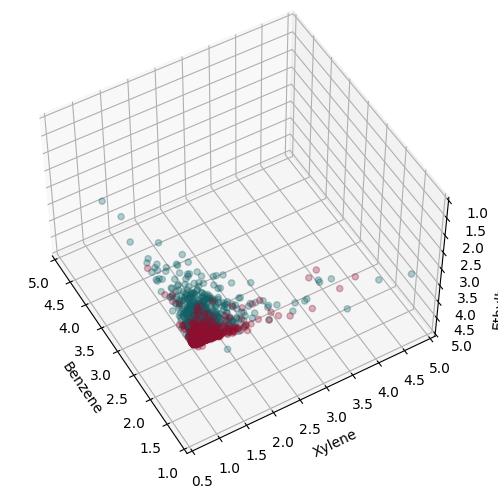

In [12]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(111, projection='3d')


ax.scatter3D(xs = smokers_nl['LBXVBZ'], ys = smokers_nl['LBXVXY'], zs = smokers_nl['LBXVEB'], c = '#126166', alpha = .3);
ax.scatter3D(xs = non_smokers_nl['LBXVBZ'], ys = non_smokers_nl['LBXVXY'], zs = non_smokers_nl['LBXVEB'], c = '#900F30', alpha = .3);
ax.set_xlim(1,5)
ax.set_zlim(1,5)
ax.set_ylim(.5,5)
ax.set_xlabel(f'Benzene')
ax.set_ylabel('Xylene')
ax.set_zlabel('Ethylbenzene')
ax.view_init(230, 30, 0)
#plt.savefig('/Users/omarafifi/Downloads/NHANES Project/data/output_images/no_log')
plt.tight_layout(w_pad = 20, h_pad = 10)
plt.show()

# Data for a three-dimensional line

#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points





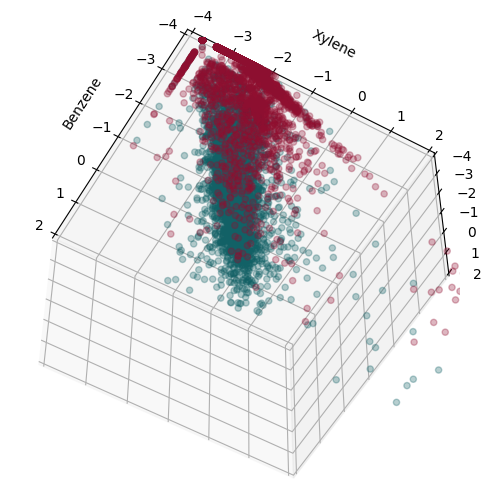

In [13]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(111, projection='3d')


ax.scatter3D(xs = smokers_l['LBXVBZ'], ys = smokers_l['LBXVXY'], zs = smokers_l['LBXVEB'], c = '#126166', alpha = .3);
ax.scatter3D(xs = non_smokers_l['LBXVBZ'], ys = non_smokers_l['LBXVXY'], zs = non_smokers_l['LBXVEB'], c = '#900F30', alpha = .3);
ax.set_xlim(-4,2)
ax.set_zlim(-4,2)
ax.set_ylim(-4,2)
ax.set_xlabel(f'Benzene')
ax.set_ylabel('Xylene')
ax.set_zlabel('Ethylbenzene')
ax.view_init(-235, 30, 0)
#plt.savefig('/Users/omarafifi/Downloads/NHANES Project/data/output_images/no_log')
plt.tight_layout(w_pad = 20, h_pad = 10)
plt.show()

# Data for a three-dimensional line

#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points


In [14]:
import plotly.graph_objects as go
import numpy as np


#THIS CODE IS TAKEN FROM:

# Helix equation
t = np.linspace(0, 10, 50)
x = smokers_l['LBXVBZ']
y = smokers_l['LBXVXY']
z = smokers_l['LBXVEB']

xp = non_smokers_l['LBXVBZ']
yp = non_smokers_l['LBXVXY']
zp = non_smokers_l['LBXVEB']

fig = go.Figure([go.Scatter3d(x=x, y=y, z=z, mode='markers',marker=dict(
        size=4,
        color='#126166',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ) ),
    go.Scatter3d(x=xp, y=yp, z=zp, mode='markers',marker=dict(
        size=4,
        color='#900F30',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ), opacity=.3 )])
x_eye = -1.25
y_eye = 2
z_eye = 0.5

fig.update_layout(
         title='Animation Test',
         width=600,
         height=600,
         scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
         updatemenus=[dict(type='buttons',
                  showactive=False,
                  y=1,
                  x=0.8,
                  xanchor='left',
                  yanchor='bottom',
                  pad=dict(t=45, r=10),
                  buttons=[dict(label='Play',
                                 method='animate',
                                 args=[None, dict(frame=dict(duration=5, redraw=True),
                                                             transition=dict(duration=0),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )]
                                            )
                                      ]
                              )
                        ]
)


def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

frames=[]
for t in np.arange(0, 6.26, 0.1):
    xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
    frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
fig.frames=frames

fig.show()

In [15]:
t = np.linspace(0, 10, 50)
x = smokers_nl['LBXVBZ']
y = smokers_nl['LBXVXY']
z = smokers_nl['LBXVEB']

xp = non_smokers_nl['LBXVBZ']
yp = non_smokers_nl['LBXVXY']
zp = non_smokers_nl['LBXVEB']

fig = go.Figure([go.Scatter3d(x=x, y=y, z=z, mode='markers',marker=dict(
        size=4,
        color='#126166',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.5
    ) ),
    go.Scatter3d(x=xp, y=yp, z=zp, mode='markers',marker=dict(
        size=4,
        color='#900F30',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.5
    ) )])

x_eye = -1.25
y_eye = 2
z_eye = 0.5

fig.update_layout(
         title='Animation Test',
         width=600,
         height=600,
         scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
         updatemenus=[dict(type='buttons',
                  showactive=False,
                  y=1,
                  x=0.8,
                  xanchor='left',
                  yanchor='bottom',
                  pad=dict(t=45, r=10),
                  buttons=[dict(label='Play',
                                 method='animate',
                                 args=[None, dict(frame=dict(duration=5, redraw=True),
                                                             transition=dict(duration=0),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )]
                                            )
                                      ]
                              )
                        ]
)


def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

frames=[]
for t in np.arange(0, 6.26, 0.1):
    xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
    frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
fig.frames=frames


fig.show()

### Constructing  Model

### Logistic Regression Model

In [17]:
import statsmodels.api as sm


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [19]:
nhanes_no_log_cc

,LBXVBZ,LBXVEB,LBXVXY,SMOKE
0,0.110,0.063,0.210,0
1,0.160,0.058,0.210,1
2,0.017,0.017,0.077,0
3,0.017,0.017,0.061,0
4,0.017,0.017,0.024,0
...,...,...,...,...
8515,0.017,0.025,0.100,0
8516,0.202,0.063,0.170,2
8517,0.149,0.062,0.179,2
8518,0.039,0.017,0.093,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(nhanes_no_log_cc.drop(['SMOKE'], axis = 1), nhanes_no_log_cc['SMOKE'],test_size=0.3,random_state=0)

model_log = sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight
                                                    = 'balanced')
model_log.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [21]:
y_prob = model_log.predict_proba(X_test)

In [22]:
#intercept
model_log.intercept_



array([ 0.85417327, -0.10254912, -0.75162416])

In [23]:
#coefficient
model_log.coef_

array([[-1.12876451e+01,  1.53810586e-01, -9.80851984e-03],
       [ 3.56691082e+00, -8.59786181e-01,  3.10415836e-01],
       [ 7.72073431e+00,  7.05975595e-01, -3.00607316e-01]])

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix




In [25]:
# Create a DataFrame to display the results
y_test = np.array(y_test).reshape(-1, 1)
y_hat = np.argmax(y_prob, axis=1)
viz_table = pd.DataFrame(data=np.concatenate((y_prob,y_hat.reshape(-1,1)), axis=1),
                         columns=[' p(0|x_i)', ' p(1|x_i)','p(2|x_i)','y_hat'])
# Display the DataFrame
viz_table

# 0- no one in the house smokes
# 1- at least one person smokes in the house but that person does not smoke
# 2- that person smokes

,p(0|x_i),p(1|x_i),p(2|x_i),y_hat
0,0.009140,0.341974,0.648886,2.0
1,0.294872,0.406006,0.299122,1.0
2,0.565682,0.277076,0.157242,0.0
3,0.565216,0.278537,0.156247,0.0
4,0.565364,0.278075,0.156560,0.0
...,...,...,...,...
2551,0.475868,0.323177,0.200954,0.0
2552,0.564137,0.284812,0.151051,0.0
2553,0.565042,0.279077,0.155881,0.0
2554,0.004534,0.318009,0.677456,2.0


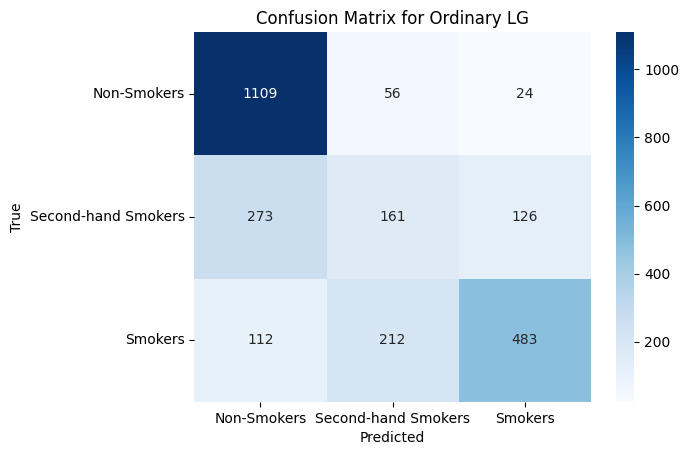

In [26]:
cm = confusion_matrix(y_test,viz_table['y_hat'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smokers', 'Second-hand Smokers', 'Smokers'],
            yticklabels=['Non-Smokers', 'Second-hand Smokers', 'Smokers'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Ordinary LG')
plt.show()


In [27]:
from sklearn.model_selection import cross_val_score

n_scores = cross_val_score(model_log, X_test, y_test, scoring='accuracy', cv=5, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.684 (0.009)


In [28]:
# Define the range of values for C
C_values = np.arange(0.01, 10.1, 0.1)  # Start from 0.01, end at 100 with an interval of 0.1

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': C_values}

# Create a logistic regression model with L2 regularization
model_log_regularized = sklearn.linear_model.LogisticRegression(penalty='l2')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_log_regularized, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']

# Print the best hyperparameters
print("Best C:", best_C)

# Fit the model to the full training data with the best hyperparameters
best_model_log = sklearn.linear_model.LogisticRegression(penalty='l2', C=best_C, class_weight
                                                    = 'balanced')
best_model_log.fit(X_train, y_train)

Best C: 9.51


LogisticRegression(C=9.51, class_weight='balanced')

In [29]:
best_model_log.coef_
best_model_log.intercept_

array([ 1.00085078, -0.15939327, -0.84145751])

In [30]:
y_prob_l2 = best_model_log.predict_proba(X_test)
y_hat = np.argmax(y_prob_l2, axis=1)
viz_table_l2 = pd.DataFrame(data=np.concatenate((y_prob_l2,y_hat.reshape(-1,1)), axis=1),
                         columns=[' p(0|x_i)', ' p(1|x_i)','p(2|x_i)','y_hat'])

# Display the DataFrame
viz_table_l2


,p(0|x_i),p(1|x_i),p(2|x_i),y_hat
0,0.002580,0.339100,0.658320,2.0
1,0.256325,0.432291,0.311384,1.0
2,0.598628,0.258441,0.142931,0.0
3,0.598108,0.260221,0.141671,0.0
4,0.598274,0.259658,0.142068,0.0
...,...,...,...,...
2551,0.483334,0.321232,0.195434,0.0
2552,0.597381,0.267607,0.135012,0.0
2553,0.597913,0.260878,0.141209,0.0
2554,0.001050,0.316405,0.682545,2.0


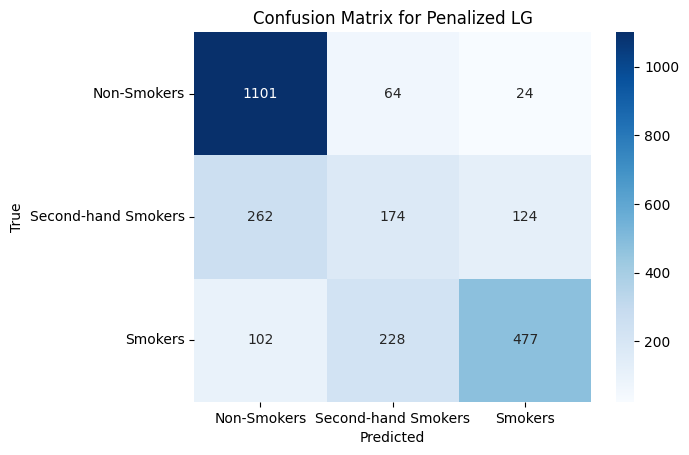

In [31]:
cm = confusion_matrix(y_test,viz_table_l2['y_hat'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smokers', 'Second-hand Smokers', 'Smokers'],
            yticklabels=['Non-Smokers', 'Second-hand Smokers', 'Smokers'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Penalized LG')
plt.show()

In [32]:
n_scores = cross_val_score(best_model_log, X_test, y_test, scoring='accuracy', cv=5, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.682 (0.011)


In [37]:
report = classification_report(y_test, viz_table['y_hat'], labels=[0,1,2])
print(report)

              precision    recall  f1-score   support

           0       0.74      0.93      0.83      1189
           1       0.38      0.29      0.33       560
           2       0.76      0.60      0.67       807

    accuracy                           0.69      2556
   macro avg       0.63      0.61      0.61      2556
weighted avg       0.67      0.69      0.67      2556



In [38]:
from sklearn.metrics import classification_report

y_true = y_test
y_pred = viz_table_l2['y_hat']

report_l2 = classification_report(y_true, y_pred, labels=[0,1,2])
print(report_l2)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83      1189
           1       0.37      0.31      0.34       560
           2       0.76      0.59      0.67       807

    accuracy                           0.69      2556
   macro avg       0.63      0.61      0.61      2556
weighted avg       0.67      0.69      0.67      2556

